In [2]:
from math import ceil
import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline
plt.rcParams['figure.dpi'] = 150 
plt.rcParams['savefig.dpi'] = 150

In [3]:
sample_rate = 22050

def generate_sine(frequency, duration, amplitude=0.5):
    each_sample = np.arange(int(duration * sample_rate))

    tone = amplitude * np.sin((2 * np.pi) * each_sample * frequency / sample_rate)
    
    return tone

In [4]:
frequency = 200 
duration = 0.0153

cycle_time = int(sample_rate / frequency)
num_samples= int(sample_rate * duration)

tone = generate_sine(frequency, duration)
tone_2 = generate_sine(frequency, duration + 0.004671201814058957)

(-0.6, 0.6)

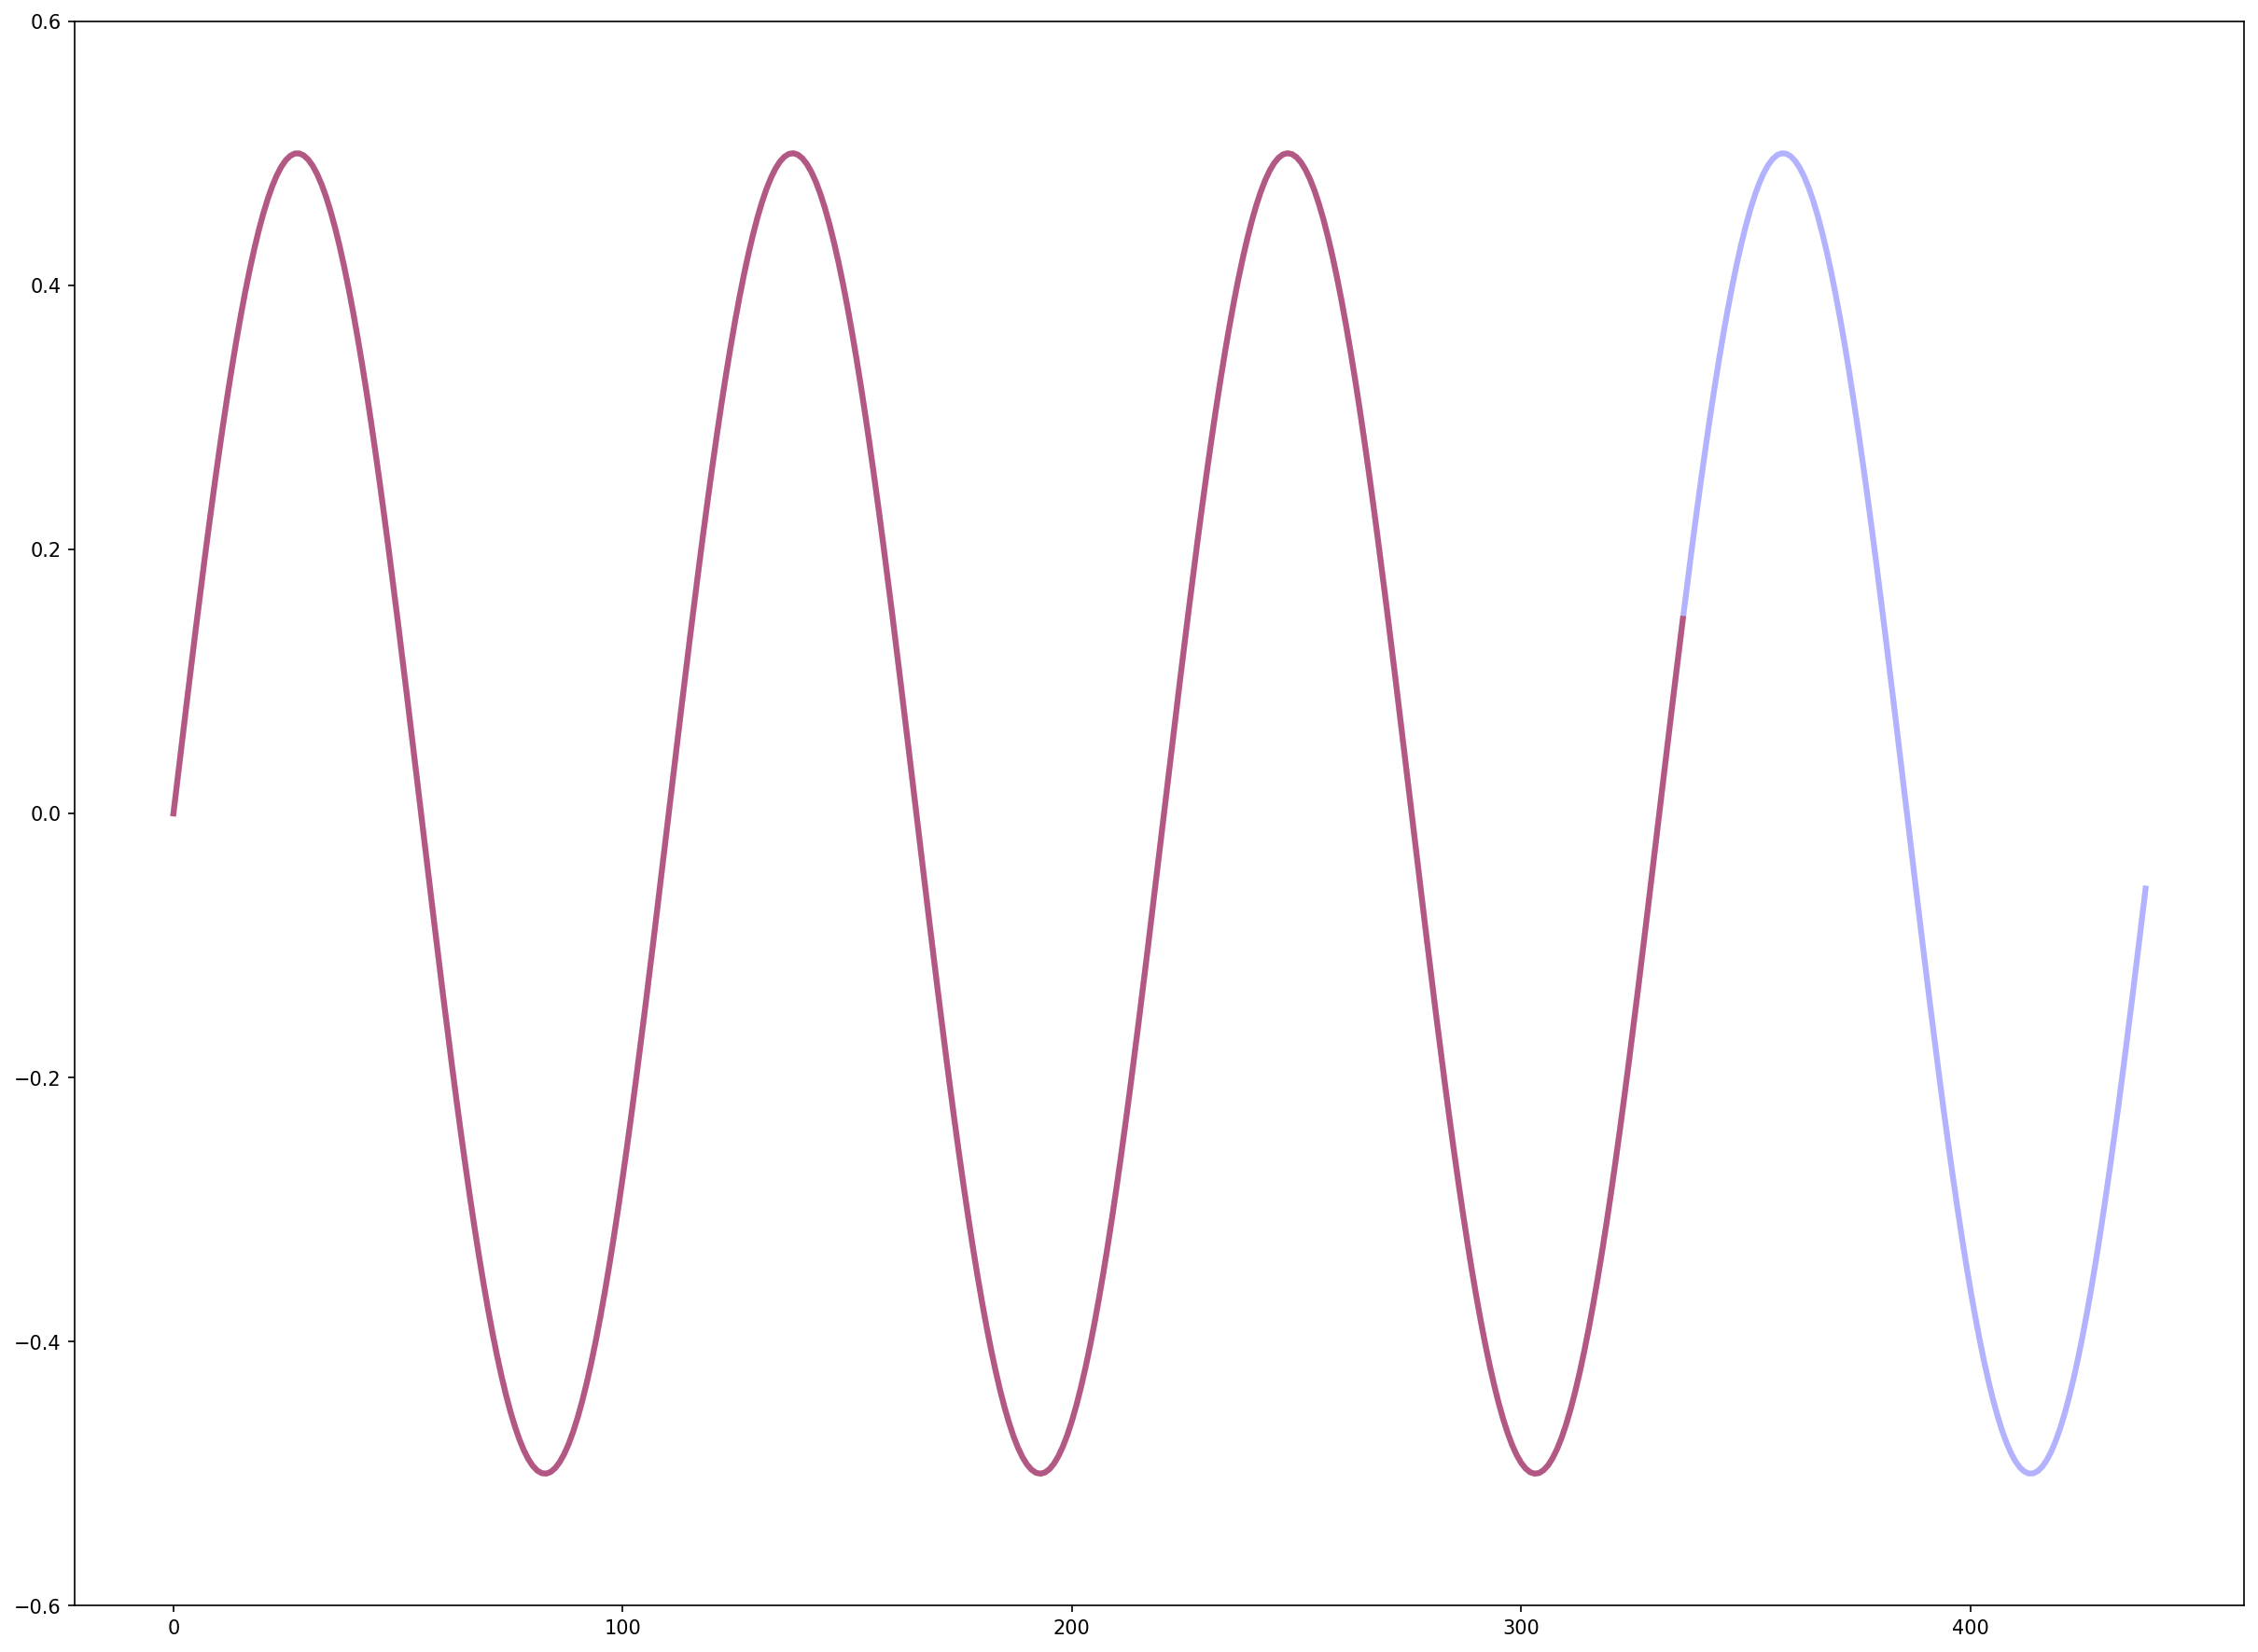

In [5]:
fig, ax = plt.subplots(figsize=(20,15))

ax.plot(
    tone, 
    linewidth=3,
    color='coral'
)

ax.plot(
    tone_2, 
    linewidth=3,
    color='blue',
    alpha=0.3
)

# ax.bar(
#     range(0, int(sample_rate*duration) + cycle_time, cycle_time), 
#     height=2, 
#     bottom=-0.6, 
#     width=0.5, 
#     color='coral', 
#     alpha=0.6
# )

# ax.bar(
#     range(0, int(sample_rate*duration)),
#     height=1,
#     bottom=-0.5,
#     width=0.4,
#     color='black',
#     alpha=0.2
# )

ax.set_ylim((-0.6, 0.6))
# fig.savefig('recycling/phase_test.png')

In [6]:
range_cycles = range(0, num_samples + cycle_time, cycle_time)
len_cycles = len(range_cycles)

In [7]:
list(range_cycles)

[0, 110, 220, 330, 440]

In [8]:
additional = (range_cycles[-1]) % num_samples 
print(f'{additional} more samples to go')

103 more samples to go


In [10]:
# in the Tone class, when it's created, use this concept: find the user's inputted duration find the closest complete cycle and "quantize" to that value
diff_second_to_last, diff_last = abs(num_samples - range_cycles[-2]), abs(num_samples - range_cycles[-1])
np.argmin([diff_second_to_last, diff_last])

diff_second_to_last, diff_last

(7, 103)

In [11]:
def quantize_duration():
    cycle_time = int(sample_rate / frequency)
    num_samples= int(sample_rate * duration)
    range_cycles = range(0, num_samples + cycle_time, cycle_time)

    diff_second_to_last, diff_last = abs(num_samples - range_cycles[-2]), abs(num_samples - range_cycles[-1])

    which_cycle = np.argmin([diff_second_to_last, diff_last])

    return range_cycles[-2] if which_cycle == 0 else range_cycles[-1]

In [12]:
duration_in_samples = quantize_duration()

In [14]:
duration_in_samples

330

In [17]:
np.arange(int(0.0153 * sample_rate))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
x 